In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *
from utils import plot_settings

plot_settings()

FIGPATH = "../figs/"
FIGSIZE = np.array([4, 3])

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

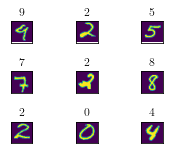

In [3]:
plt.figure(figsize = FIGSIZE * 0.75)
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.savefig(FIGPATH+"MNIST_example.pdf")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


Initializing weights using: Normal distribution


In [8]:
def run_mnist(activation, shape, init_weights_method, learning_rate = 0.01,N_epochs = 200):
    
    N_epochs = 100
    epochs_per_itter = 1

    FFNN = FFNNClassifier(
        X=X_train,
        Y=y_train,
        activation=activation,
        network_shape=shape,
        init_weights_method=init_weights_method
    )
    
    #FFNN.weights = w_skl
    #FFNN.biases = b_skl

    scores = np.zeros(N_epochs)
    for i in range(len(scores)):
        FFNN.train(int(len(y_train) / 32), 0.01, epochs_per_itter)
        scores[i] = FFNN.score(y_test, X_test)
        
    return scores

Initializing weights using: He
Initializing weights using: He
0.9347142857142857
0.9405


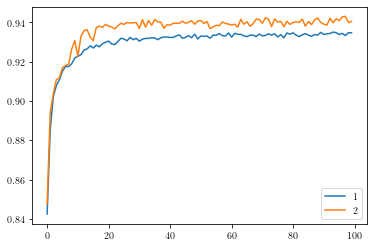

In [14]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [10],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [10, 10, 10],
    init_weights_method = "he",
    learning_rate = 0.01
)

plt.plot(ReLU_1, label="1")
plt.plot(ReLU_2, label="2")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
0.9778571428571429
0.9709285714285715
0.9652857142857143
0.9361428571428572


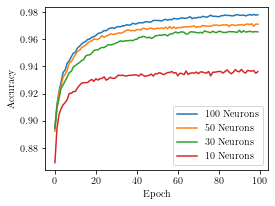

In [23]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [100],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [50],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_3 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [30],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_4 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [10],
    init_weights_method = "he",
    learning_rate = 0.01
)

plt.figure(figsize=FIGSIZE)
plt.plot(ReLU_1, label="100 Neurons")
plt.plot(ReLU_2, label="50 Neurons")
plt.plot(ReLU_3, label="30 Neurons")
plt.plot(ReLU_4, label="10 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])
print(ReLU_3[-1])
print(ReLU_4[-1])
plt.savefig("MNIST_layers_ReLU.pdf")

Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
0.96
0.9579285714285715
0.9537142857142857
0.9303571428571429


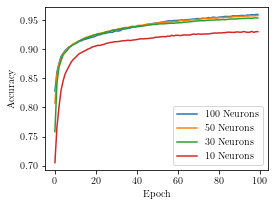

In [24]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [100],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [50],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

ReLU_3 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [30],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

ReLU_4 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [10],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

plt.figure(figsize=FIGSIZE)
plt.plot(ReLU_1, label="100 Neurons")
plt.plot(ReLU_2, label="50 Neurons")
plt.plot(ReLU_3, label="30 Neurons")
plt.plot(ReLU_4, label="10 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])
print(ReLU_3[-1])
print(ReLU_4[-1])
plt.savefig("MNIST_layers_Xavier.pdf")

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
0.9768571428571429
0.9729285714285715
0.9652142857142857
0.9419285714285714


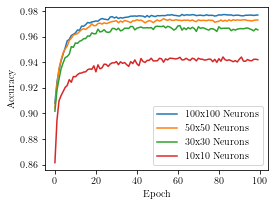

In [25]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [100,100],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [50,50],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_3 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [30,30],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_4 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [10,10],
    init_weights_method = "he",
    learning_rate = 0.01
)

plt.figure(figsize=FIGSIZE)
plt.plot(ReLU_1, label="100x100 Neurons")
plt.plot(ReLU_2, label="50x50 Neurons")
plt.plot(ReLU_3, label="30x30 Neurons")
plt.plot(ReLU_4, label="10x10 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])
print(ReLU_3[-1])
print(ReLU_4[-1])
plt.savefig("MNIST_layers_ReLU_2_layers.pdf")

Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
0.9632142857142857
0.9606428571428571
0.9573571428571429
0.9288571428571428


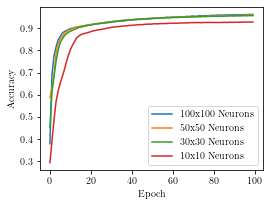

In [26]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [100,100],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [50,50],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

ReLU_3 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [30,30],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

ReLU_4 = run_mnist(
    activation=ActivationFunctions.Sigmoid,
    shape = [10,10],
    init_weights_method = "xavier",
    learning_rate = 0.01
)

plt.figure(figsize=FIGSIZE)
plt.plot(ReLU_1, label="100x100 Neurons")
plt.plot(ReLU_2, label="50x50 Neurons")
plt.plot(ReLU_3, label="30x30 Neurons")
plt.plot(ReLU_4, label="10x10 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])
print(ReLU_3[-1])
print(ReLU_4[-1])
plt.savefig("MNIST_layers_Sigmoid_2_layers.pdf")

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
0.9770714285714286
0.9702857142857143
0.9742142857142857
0.9627857142857142


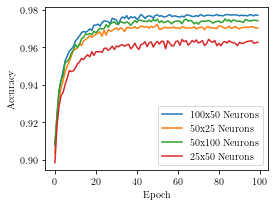

In [27]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [100,50],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [50,25],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_3 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [50,100],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_4 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [25,50],
    init_weights_method = "he",
    learning_rate = 0.01
)

plt.figure(figsize=FIGSIZE)
plt.plot(ReLU_1, label="100x50 Neurons")
plt.plot(ReLU_2, label="50x25 Neurons")
plt.plot(ReLU_3, label="50x100 Neurons")
plt.plot(ReLU_4, label="25x50 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])
print(ReLU_3[-1])
print(ReLU_4[-1])
plt.savefig("MNIST_layers_ReLU_2_irregular_layers.pdf")

Initializing weights using: He
Initializing weights using: He
0.9762857142857143
0.9747142857142858


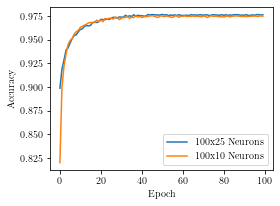

In [28]:
ReLU_1 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [100,25],
    init_weights_method = "he",
    learning_rate = 0.01
)

ReLU_2 = run_mnist(
    activation=ActivationFunctions.ReLU,
    shape = [100,10],
    init_weights_method = "he",
    learning_rate = 0.01
)

plt.figure(figsize=FIGSIZE)
plt.plot(ReLU_1, label="100x25 Neurons")
plt.plot(ReLU_2, label="100x10 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
print(ReLU_1[-1])
print(ReLU_2[-1])
plt.savefig("MNIST_layers_ReLU_2_irregular_subset_layers.pdf")

Initializing weights using: Normal distribution
20


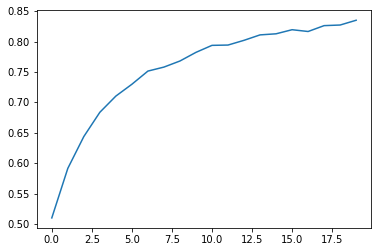

In [26]:
FFNN = FFNNClassifier(
    X=X_train,
    Y=y_train,
    activation=ActivationFunctions.ReLU,
    network_shape=[30],
    init_method = "he"
)

scores = np.zeros(20)
for i in range(len(scores)):
    FFNN.train(int(len(y_train) / 32), 0.01, 1)
    scores[i] = FFNN.score(y_test, X_test)
    
plt.plot(scores)
print(FFNN.total_epochs)

In [84]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30],
    activation = "relu",
    solver='sgd',
    batch_size = 32,
    learning_rate_init = 0.01,
    alpha = 0,
    momentum = 0,
    max_iter = 1
)
SKL_NN.fit(X_train, y_train)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0, batch_size=32, hidden_layer_sizes=[30],
              learning_rate_init=0.01, max_iter=1, momentum=0, solver='sgd')

In [68]:
print("score: ",SKL_NN.score(X_test, y_test))
print("activation: ", SKL_NN.out_activation_)
print("no. itterations: ",SKL_NN.n_iter_)

score:  0.8891428571428571
activation:  softmax
no. itterations:  1


In [85]:
w_skl = np.array(SKL_NN.coefs_, dtype='object')
b_skl = np.array(SKL_NN.intercepts_, dtype='object')

for i in range(len(w_skl)):
    w_skl[i] = w_skl[i].T